In [2]:
import os

from IPython.display import set_matplotlib_formats
import jax.numpy as jnp
from jax import random, vmap
from jax.scipy.special import logsumexp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import numpyro
from numpyro.diagnostics import hpdi
import numpyro.distributions as dist
from numpyro import handlers
from numpyro.infer import MCMC, NUTS


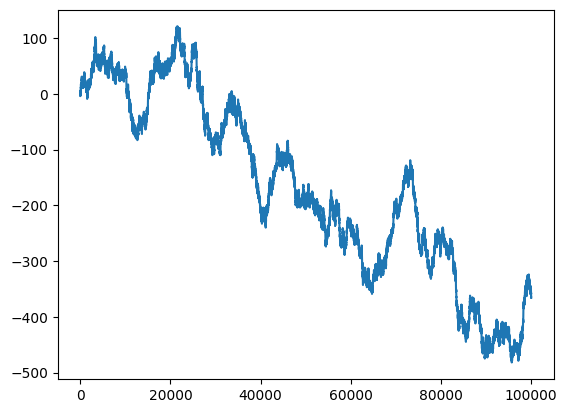

In [14]:
key = random.PRNGKey(0)
rademacher_samples = random.rademacher(key, shape=(100_000, 1))
sums = jnp.cumsum(rademacher_samples, axis=0)
plt.plot(sums)

In [16]:
key = random.PRNGKey(0)

sample_size = 10_000
batch_size = 100
event_size = 1

rademacher_samples = random.rademacher(key, shape=(sample_size, batch_size, event_size))
sums = jnp.cumsum(rademacher_samples, axis=0)
# plt.plot(sums)

(10000, 100, 1)